# Ajuste de curvas para diferentes elementos obtenidos por medio de espectroscopia de fotoemision de rayos X (Ag3d, O1s, C1s)


## Objetivos:

### Objetivos Generales:
* Realizar un ajuste de curva polinomico a un conjunto de datos obtenidos por medio de espectroscopia de fotoemision de rayos x, con el menor grado de error posible

### Objetivos Especificos:
* Importar correctamente los datos a ajustar.
* Ajustar los datos a polinomios de distintos ordenes.
* Determinar el grado de error de cada ajuste realizado.
* Encontrar el orden del polinomio con el que se obtenga el mejor ajuste de curva.

## Modelo que representa el problema.

* En este proyecto, se realizara un ajuste de curva en conjunto con los datos obtenidos en una clase de sintesis y caracterizacion de nanomateriales, en el cual de caracterizaron nanoparticulas de plata, para saber el porcentaje atomico promedio que hay en la mustra. Estos datos muestran la energia con la que fue liberado el electron del elemento en especifico a buscar. Cabe destacar que el programa que se utiliza para este analisis, tiene un costo elevado, el proposito de este pryecto es intentar ajustar una curva que se adabte de manera similar a como lo realiza el programa y en un futuro calcular el area bajo la curva para obtener el porcentaje atomico en base a el area bajo la curva y otras formulas relacionadas. 

In [1]:
import sympy as sp
import numpy as np 
import quandl
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
sp.init_printing(use_latex='mathjax')
sp.var('x', real=True)

x

In [2]:
dta1 = data = pd.read_csv('data_C1s.csv')
dta2 = data = pd.read_csv('data_O1s.csv')
dta3 = data = pd.read_csv('data_Ag3d.csv')

#  --------------------------------------------------------C1s------------------------------------------------

In [3]:
dta1.T # Datos del carbono (C1s)

,0,1,2,3,4,5,6,7,8,9,...,61,62,63,64,65,66,67,68,69,70
Energy,289.0000,288.9000,288.8000,288.7000,288.6000,288.5000,288.4000,288.300,288.2000,288.1000,...,282.9000,282.8000,282.7000,282.600,282.5000,282.4000,282.3000,282.2000,282.1000,282.0000
Counts/s,1385.4567,1407.8728,1421.5516,1406.3087,1482.6862,1577.9667,1590.4106,1622.849,1668.2892,1697.8417,...,1078.9965,1052.8377,1031.1644,1026.463,1015.7904,1069.3631,1049.0093,1037.8533,1010.9167,1004.6584


In [4]:
dta1.values[0], dta1.values[70] 

(array([ 289.    , 1385.4567]), array([ 282.    , 1004.6584]))

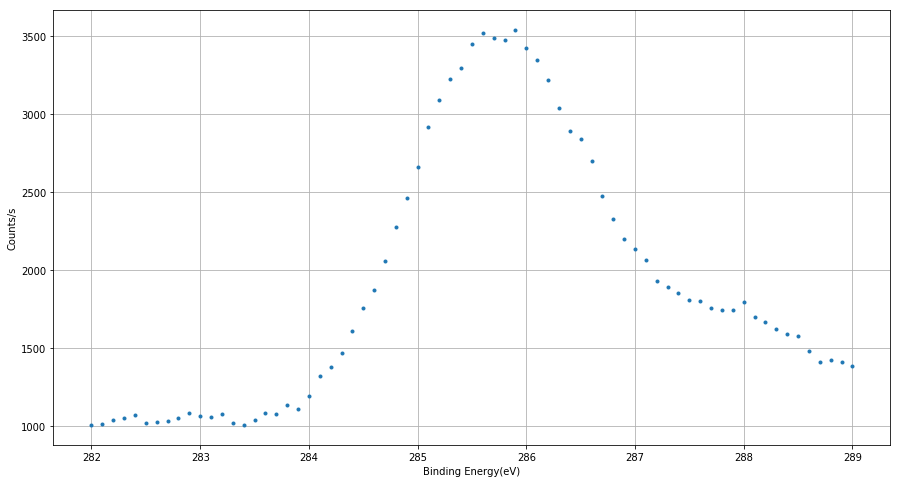

In [39]:
plt.figure(figsize=(15,8))
x = dta1.values[:,0]
y = dta1.values[:,1]
plt.plot(x, y, 'o', ms=3)
plt.ylabel('Counts/s')
plt.xlabel('Binding Energy(eV)')
plt.grid()

In [6]:
def obj(beta, x, y, f):
    return np.sum((y-f(x, beta))**2)

In [7]:
# Ajuste Lineal 
def f1(x, beta):
    return beta[0] + beta[1]*x

# Ajuste Cuadratico
def f2(x, beta):
    return beta[0] + beta[1]*x + beta[2]*x**2

# Ajuste Cubico
def f3(x, beta):
    return beta[0] + beta[1]*x + beta[2]*x**2 + beta[3]*x**3 

def f4(x, beta):
    return 1400 + beta[0]*np.sinc(0.65*(x-285.8))

def f5(x, beta):
    return 1400 + beta[0]*np.sinc(0.65*(x-287.5))

In [8]:
beta0_1=[1,1]
sol1=opt.minimize(obj, beta0_1, args=(x, y, f1))

beta0_2=[1,1,1]
sol2=opt.minimize(obj, beta0_2, args=(x, y, f2)) 

beta0_3=[1,1,1,1]
sol3=opt.minimize(obj, beta0_3, args=(x, y, f3))

beta0_4=[1]
sol4=opt.minimize(obj, beta0_4, args=(x, y, f4))

beta0_5=[1]
sol5=opt.minimize(obj, beta0_5, args=(x, y, f5))

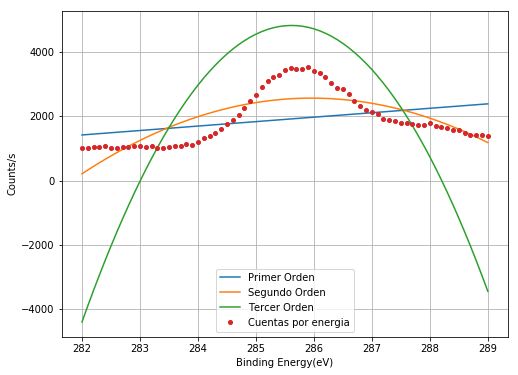

In [9]:
plt.figure(figsize=(8,6))
plt.plot(x, f1(x, sol1.x), '-', label='Primer Orden' )
plt.plot(x, f2(x, sol2.x), '-', label='Segundo Orden' )
plt.plot(x, f3(x, sol3.x), '-', label='Tercer Orden' )
plt.plot(x, y, 'o', ms=4, label='Cuentas por energia')
plt.legend(loc='best')
plt.ylabel('Counts/s')
plt.xlabel('Binding Energy(eV)')
plt.grid()

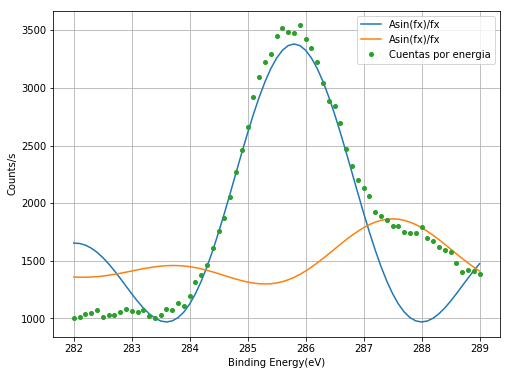

In [10]:
plt.figure(figsize=(8,6))
plt.plot(x, f4(x, sol4.x), '-', label = 'Asin(fx)/fx')
plt.plot(x, f5(x, sol5.x), '-', label = 'Asin(fx)/fx')
plt.plot(x, y, 'o', ms=4, label='Cuentas por energia')
plt.legend(loc='best')
plt.ylabel('Counts/s')
plt.xlabel('Binding Energy(eV)')
plt.grid()

In [11]:
#sol.fun --> es la suma de los errores al cuadrado.
#sol.x ----> son los valores que minimizan la funcion objetivo (obj)

In [12]:
sol1.fun/10000, sol2.fun/10000, sol3.fun/10000, sol4.fun/10000, sol5.fun/10000

(4228.588219482709, 1829.9896017685294, 33226.76135539761, 852.873087563053, 6
304.907880108581)

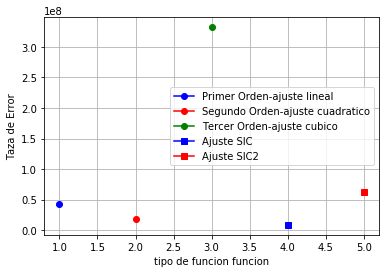

In [13]:
plt.plot([1], sol1.fun, '-bo', label='Primer Orden-ajuste lineal')
plt.plot([2], sol2.fun, '-ro', label='Segundo Orden-ajuste cuadratico')
plt.plot([3], sol3.fun, '-go', label='Tercer Orden-ajuste cubico')
plt.plot([4], sol4.fun, '-bs', label='Ajuste SIC')
plt.plot([5], sol5.fun, '-rs', label='Ajuste SIC2')

plt.legend(loc='best')
plt.ylabel('Taza de Error')
plt.xlabel('tipo de funcion funcion')
plt.grid()

### Aqui se puede observar que la funcion que mejor se adapta, es la funcion 4 que pertenece a $\frac{Asin(fx)}{fx}$

### Sin embargo se tienen que modificar muchos parametros externos, como lo es el desplzamiento de la funcion, y la altura a la que inicia.

# ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

#  --------------------------------------------------------O1s------------------------------------------------

In [14]:
import sympy as sp
import numpy as np 
import quandl
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as opt
sp.init_printing(use_latex='mathjax')
sp.var('x', real=True)

dta2.T # Datos del Oxigeno (O1s)

,0,1,2,3,4,5,6,7,8,9,...,151,152,153,154,155,156,157,158,159,160
Energy,540.0000,539.9000,539.8000,539.7000,539.6000,539.5000,539.4000,539.3000,539.2000,539.1000,...,524.9000,524.8000,524.7000,524.6000,524.5000,524.4000,524.3000,524.2000,524.1000,524.0000
Counts/s,5385.6327,5377.0126,5445.4113,5378.0184,5371.6017,5441.8836,5382.8602,5341.9636,5305.2001,5411.0367,...,5285.9132,5320.0378,5344.1958,5361.8617,5330.3347,5331.6371,5364.6991,5306.4743,5407.4567,5391.1568


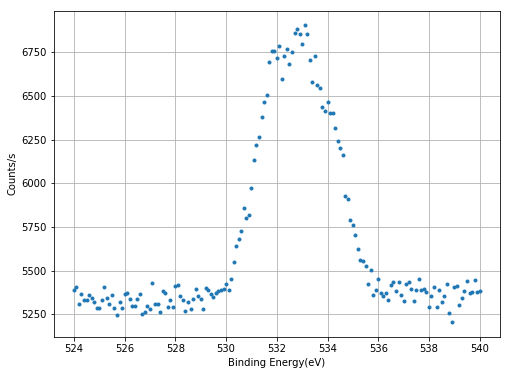

In [15]:
plt.figure(figsize=(8,6))
x = dta2.values[:,0]
y = dta2.values[:,1]
plt.plot(x, y, 'o', ms=3)
plt.ylabel('Counts/s')
plt.xlabel('Binding Energy(eV)')
plt.grid()

In [16]:
def obj(beta, x, y, f):
    return np.sum((y-f(x, beta))**2)

In [17]:
# Ajuste Lineal 
def f1(x, beta):
    return beta[0] + beta[1]*x

# Ajuste Cuadratico
def f2(x, beta):
    
    return beta[0] + beta[1]*x + beta[2]*x**2

# Ajuste Cubico
def f3(x, beta):
    return beta[0] + beta[1]*x + beta[2]*x**2 + beta[3]*x**3 

def f4(x, beta):
    return 5550 + beta[0]*np.sinc(0.35*(x-533))

#def f5(x, beta):
#    return 1400 + beta[0]*np.sinc(1/2*(x-533))

In [18]:
beta0_1=[1,1]
sol1=opt.minimize(obj, beta0_1, args=(x, y, f1))

beta0_2=[1,1,1]
sol2=opt.minimize(obj, beta0_2, args=(x, y, f2)) 

beta0_3=[1,1,1,1]
sol3=opt.minimize(obj, beta0_3, args=(x, y, f3))

beta0_4=[1]
sol4=opt.minimize(obj, beta0_4, args=(x, y, f4))

#beta0_5=[1]
#sol5=opt.minimize(obj, beta0_5, args=(x, y, f5))

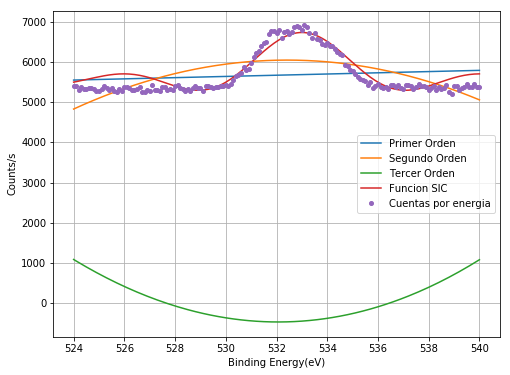

In [19]:
plt.figure(figsize=(8,6))
plt.plot(x, f1(x, sol1.x), '-', label='Primer Orden' )
plt.plot(x, f2(x, sol2.x), '-', label='Segundo Orden' )
plt.plot(x, f3(x, sol3.x/100), '-', label='Tercer Orden' )
plt.plot(x, f4(x, sol4.x), '-', label='Funcion SIC' )
plt.plot(x, y, 'o', ms=4, label='Cuentas por energia')
plt.legend(loc='best')
plt.ylabel('Counts/s')
plt.xlabel('Binding Energy(eV)')
plt.grid()

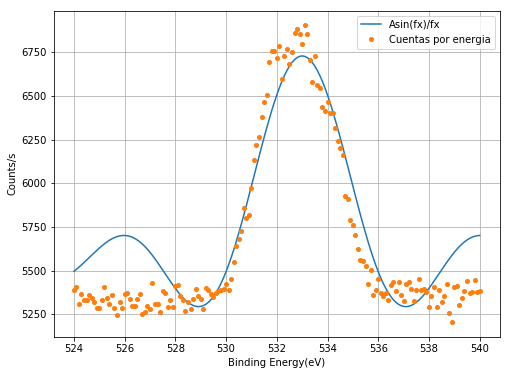

In [20]:
plt.figure(figsize=(8,6))
plt.plot(x, f4(x, sol4.x), '-', label = 'Asin(fx)/fx')
#plt.plot(x, f5(x, sol5.x), '-', label = 'Asin(fx)/fx')
plt.plot(x, y, 'o', ms=4, label='Cuentas por energia')
plt.legend(loc='best')
plt.ylabel('Counts/s')
plt.xlabel('Binding Energy(eV)')
plt.grid()

In [21]:
#sol.fun --> es la suma de los errores al cuadrado.
#sol.x ----> son los valores que minimizan la funcion objetivo (obj)

In [22]:
sol1.fun/10000, sol2.fun/10000, sol3.fun/10000000, sol4.fun/10000

(4161.521087435697, 2531.9210566457523, 35763.10620602242, 634.6740643061639)

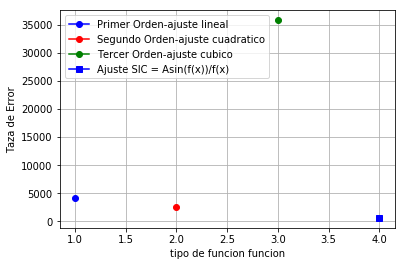

In [23]:
plt.plot([1], sol1.fun/10000, '-bo', label='Primer Orden-ajuste lineal')
plt.plot([2], sol2.fun/10000, '-ro', label='Segundo Orden-ajuste cuadratico')
plt.plot([3], sol3.fun/10000000, '-go', label='Tercer Orden-ajuste cubico')
plt.plot([4], sol4.fun/10000, '-bs', label='Ajuste SIC = Asin(f(x))/f(x)')
plt.legend(loc='best')
plt.ylabel('Taza de Error')
plt.xlabel('tipo de funcion funcion')
plt.grid()

# En el Caso del Oxigeno, se puede observar que la funcion que mejor se adapta al modelo de datos del oxigeno es la funcion $SINC = A\frac{\sin(f(x))}{f(x)}$ 

# ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||

#  --------------------------------------------------------Ag3d------------------------------------------------

In [24]:
dta3.T # Datos de la plata (Ag3d)

,0,1,2,3,4,5,6,7,8,9,...,121,122,123,124,125,126,127,128,129,130
Energy,378.0000,377.9000,377.8000,377.7000,377.600,377.5000,377.400,377.3000,377.2000,377.1000,...,365.9000,365.8000,365.7000,365.600,365.5000,365.4000,365.3000,365.2000,365.1000,365.0000
Counts/s,4291.8464,4311.9674,4402.8375,4321.7782,4301.925,4176.3309,4111.683,4033.1571,3955.6238,3931.2876,...,1492.7835,1452.3324,1358.9046,1352.759,1340.3059,1286.7107,1305.1436,1284.2283,1298.2365,1301.1407


In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import scipy.optimize as opt
import sympy as sp
sp.init_printing(use_latex='mathjax')
sp.var('x', real=True)

x

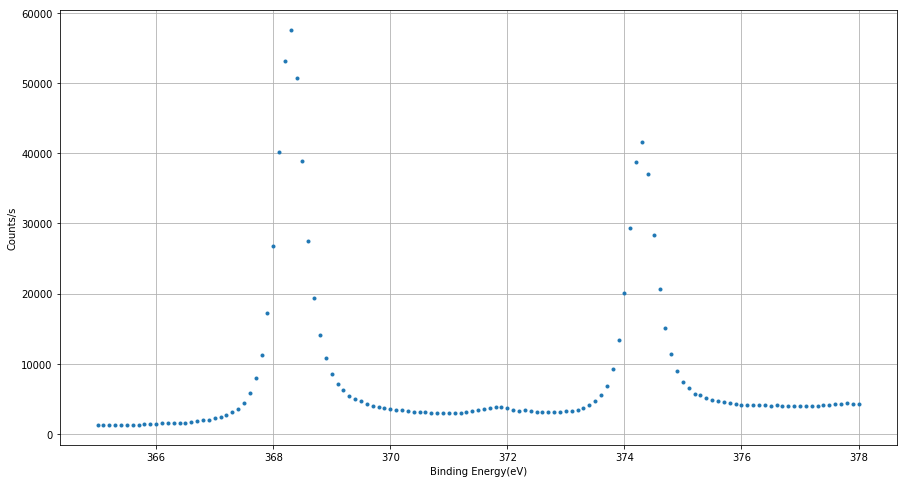

In [26]:
plt.figure(figsize=(15,8))
x = dta3.values[:,0]
y = dta3.values[:,1]
plt.plot(x, y, 'o', ms=3)
plt.ylabel('Counts/s')
plt.xlabel('Binding Energy(eV)')
plt.grid()

In [27]:
def obj(beta, x, y, f):
    return np.sum((y-f(x, beta))**2)

In [28]:
# Ajuste Lineal 
def f1(x, beta):
    return 2500 + beta[0] + beta[1]*x

# Ajuste Cuadratico
def f2(x, beta):
    return 2500 + beta[0] + beta[1]*x + beta[2]*x**2

# Ajuste Cubico
def f3(x, beta):
    return 2500 + beta[0] + beta[1]*x + beta[2]*x**2 + beta[3]*x**3 

def f4(x, beta):
    return 2500 + beta[0]*np.sinc(3.5*(x-368.3)) #Perteneciente al primer pico de Ag.

#-----------------------------------------------------------------------------------------------------------
# Ajuste Lineal 
def f5(x, beta):
    return 3500 + beta[0] + beta[1]*x

# Ajuste Cuadratico
def f6(x, beta):
    return 3500 + beta[0] + beta[1]*x + beta[2]*x**2

# Ajuste Cubico
def f7(x, beta):
    return 3500 + beta[0] + beta[1]*x + beta[2]*x**2 + beta[3]*x**3 

def f8(x, beta):
    return 3000 + beta[0]*np.sinc(3*(x-374.3)) #Perteneciente al segundo pico de Ag.

In [29]:
beta0_1=[1,1]
sol1=opt.minimize(obj, beta0_1, args=(x, y, f1))

beta0_2=[1,1,1]
sol2=opt.minimize(obj, beta0_2, args=(x, y, f2)) 

beta0_3=[1,1,1,1]
sol3=opt.minimize(obj, beta0_3, args=(x, y, f3))

beta0_4=[1]
sol4=opt.minimize(obj, beta0_4, args=(x, y, f4))  #Perteneciente al primer pico de Ag.

#-------------------------------------------------------------------------------------------------------------------

beta0_5=[1,1]
sol5=opt.minimize(obj, beta0_5, args=(x, y, f5))

beta0_6=[1,1,1]
sol6=opt.minimize(obj, beta0_6, args=(x, y, f6)) 

beta0_7=[1,1,1,1]
sol7=opt.minimize(obj, beta0_7, args=(x, y, f7))

beta0_8=[1]
sol8=opt.minimize(obj, beta0_8, args=(x, y, f8)) #Perteneciente al segundo pico de Ag.

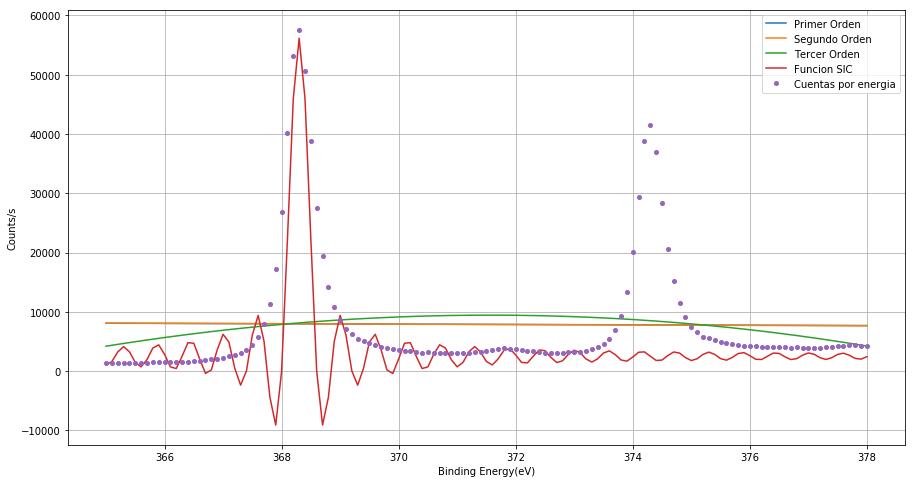

In [30]:
plt.figure(figsize=(15,8))
plt.plot(x, f1(x, sol1.x), '-', label='Primer Orden' )
plt.plot(x, f2(x, sol2.x), '-', label='Segundo Orden' )
plt.plot(x, f3(x, sol3.x), '-', label='Tercer Orden' )
plt.plot(x, f4(x, sol4.x), '-', label='Funcion SIC' )
plt.plot(x, y, 'o', ms=4, label='Cuentas por energia')
plt.legend(loc='best')
plt.ylabel('Counts/s')
plt.xlabel('Binding Energy(eV)')
plt.grid()

In [31]:
#sol.fun --> es la suma de los errores al cuadrado.
#sol.x ----> son los valores que minimizan la funcion objetivo (obj)

In [32]:
sol1.fun/1000000000, sol2.fun/1000000000, sol3.fun/1000000000, sol4.fun/1000000000

(15.759510425707393, 15.758640401400218, 15.25203004169512, 11.360580141901936
)

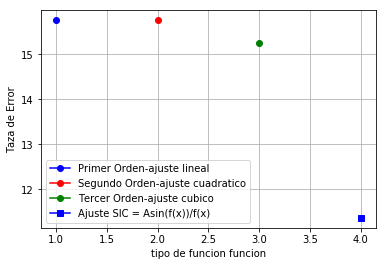

In [33]:
plt.plot([1], sol1.fun/1000000000, '-bo', label='Primer Orden-ajuste lineal')
plt.plot([2], sol2.fun/1000000000, '-ro', label='Segundo Orden-ajuste cuadratico')
plt.plot([3], sol3.fun/1000000000, '-go', label='Tercer Orden-ajuste cubico')
plt.plot([4], sol4.fun/1000000000, '-bs', label='Ajuste SIC = Asin(f(x))/f(x)')
plt.legend(loc='best')
plt.ylabel('Taza de Error')
plt.xlabel('tipo de funcion funcion')
plt.grid()

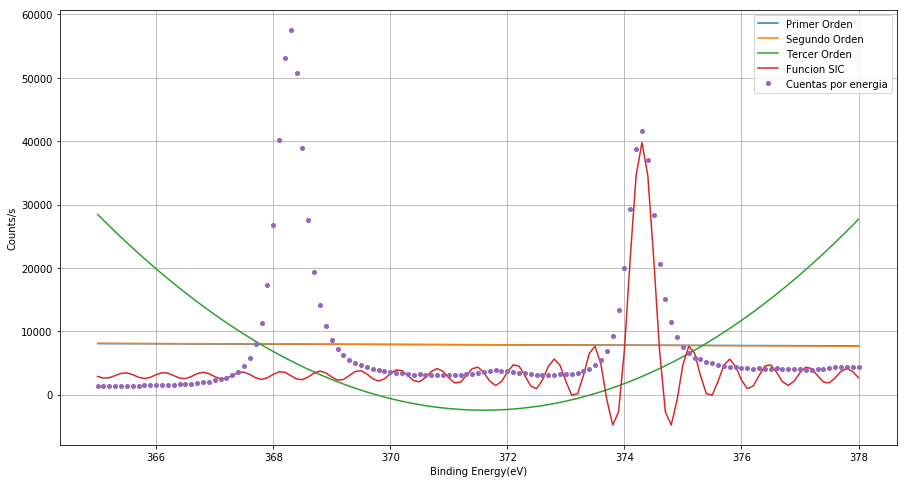

In [34]:
plt.figure(figsize=(15,8))
plt.plot(x, f5(x, sol5.x), '-', label='Primer Orden' )
plt.plot(x, f6(x, sol6.x), '-', label='Segundo Orden' )
plt.plot(x, f7(x, sol7.x), '-', label='Tercer Orden' )
plt.plot(x, f8(x, sol8.x), '-', label='Funcion SIC' )
plt.plot(x, y, 'o', ms=4, label='Cuentas por energia')
plt.legend(loc='best')
plt.ylabel('Counts/s')
plt.xlabel('Binding Energy(eV)')
plt.grid()

In [35]:
sol5.fun/1000000000, sol6.fun/1000000000, sol7.fun/1000000000, sol8.fun/1000000000

(15.759522654396255, 15.758655035728118, 31.87039995503981, 14.389225644854212
)

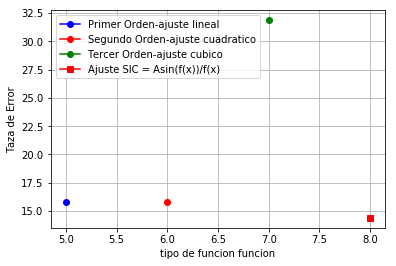

In [36]:
plt.plot([5], sol5.fun/1000000000, '-bo', label='Primer Orden-ajuste lineal')
plt.plot([6], sol6.fun/1000000000, '-ro', label='Segundo Orden-ajuste cuadratico')
plt.plot([7], sol7.fun/1000000000, '-go', label='Tercer Orden-ajuste cubico')
plt.plot([8], sol8.fun/1000000000, '-rs', label='Ajuste SIC = Asin(f(x))/f(x)')
plt.legend(loc='best')
plt.ylabel('Taza de Error')
plt.xlabel('tipo de funcion funcion')
plt.grid()

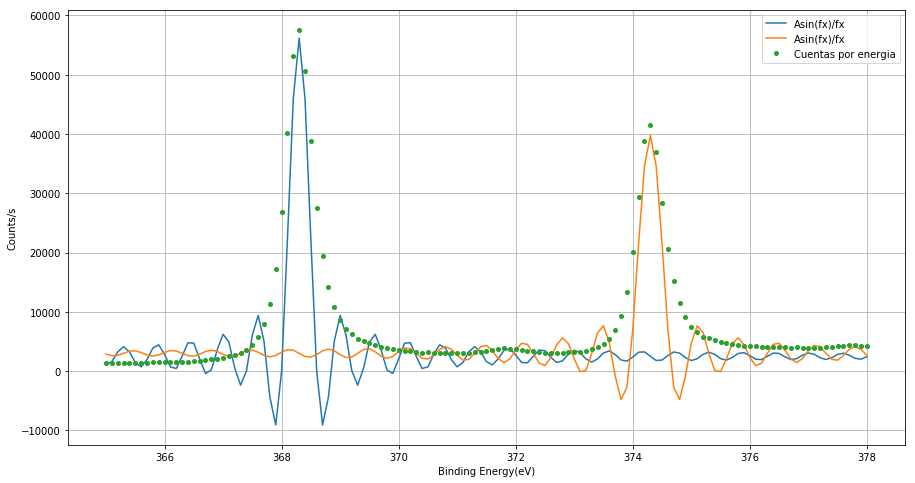

In [37]:
plt.figure(figsize=(15,8))
plt.plot(x, f4(x, sol4.x), '-', label = 'Asin(fx)/fx')
plt.plot(x, f8(x, sol8.x), '-', label = 'Asin(fx)/fx')
plt.plot(x, y, 'o', ms=4, label='Cuentas por energia')
plt.legend(loc='best')
plt.ylabel('Counts/s')
plt.xlabel('Binding Energy(eV)')
plt.grid()

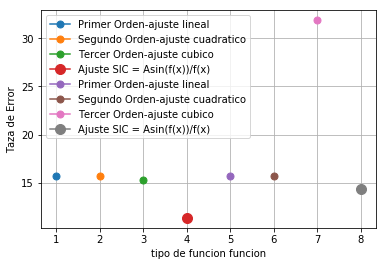

In [38]:
plt.plot([1], sol1.fun/1000000000, '-o', ms=7, label='Primer Orden-ajuste lineal')
plt.plot([2], sol2.fun/1000000000, '-o', ms=7, label='Segundo Orden-ajuste cuadratico')
plt.plot([3], sol3.fun/1000000000, '-o', ms=7, label='Tercer Orden-ajuste cubico')
plt.plot([4], sol4.fun/1000000000, '-o', ms=10, label='Ajuste SIC = Asin(f(x))/f(x)')
plt.plot([5], sol5.fun/1000000000, '-o', ms=7, label='Primer Orden-ajuste lineal')
plt.plot([6], sol6.fun/1000000000, '-o', ms=7, label='Segundo Orden-ajuste cuadratico')
plt.plot([7], sol7.fun/1000000000, '-o', ms=7, label='Tercer Orden-ajuste cubico')
plt.plot([8], sol8.fun/1000000000, '-o', ms=10, label='Ajuste SIC = Asin(f(x))/f(x)')
plt.legend(loc='best')
plt.ylabel('Taza de Error')
plt.xlabel('tipo de funcion funcion')
plt.grid()

# En todos los casos para cada elemento, podemos observar que la funcion que mas se aproxima a los datos obtenidos es la funcion $SINC = A\frac{\sin(f(x))}{f(x)}$ incluso cuando se tienen dos picos con diferente energia de enlace.